In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data=open(r"/content/sample_data/data1.csv")
df_raw = pd.read_csv(train_data)
df_raw.shape


(11952, 9)

In [ ]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Built-up Area,Ready To Move,100 Feet Road-Koramangala,1 BHK,Non Builder,937,2.0,0.0,82.98072
1,Built-up Area,Ready To Move,100 Feet Road-Koramangala,2 BHK,Non Builder,1018,2.0,1.0,90.15408
2,Super built-up Area,Ready To Move,100 Feet Road-Koramangala,3 BHK,Non Builder,1276,2.0,1.0,110.96096
3,Super built-up Area,Ready To Move,100 Feet Road-Koramangala,4 BHK,Non Builder,1375,4.0,2.0,119.57000
4,Plot Area,Ready To Move,100 Feet Road-Koramangala,2 Bedroom,Non Builder,1143,3.0,3.0,90.54846


In [ ]:

df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
11947,Super built-up Area,Ready To Move,Yettakodi,4 BHK,Non Builder,1338,3.0,3.0,251.35668
11948,Plot Area,Ready To Move,Yettakodi,3 Bedroom,Non Builder,1539,2.0,1.0,102.35889
11949,Plot Area,Ready To Move,Yettakodi,6 Bedroom,Non Builder,2036,5.0,5.0,135.41436
11950,Plot Area,Ready To Move,Yettakodi,1 RK,Non Builder,334,1.0,0.0,10.27050
11951,Super built-up Area,Ready To Move,Yettakodi,4 Bedroom,NaN,334,1.0,NaN,45.89828


In [ ]:
df = df_raw.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11952 entries, 0 to 11951
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     11952 non-null  object 
 1   availability  11952 non-null  object 
 2   location      11952 non-null  object 
 3   size          11952 non-null  object 
 4   society       11308 non-null  object 
 5   total_sqft    11952 non-null  int64  
 6   bath          11295 non-null  float64
 7   balcony       11552 non-null  float64
 8   price         11952 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 840.5+ KB


In [ ]:
df.describe()

,total_sqft,bath,balcony,price
count,11952.000000,11295.000000,11552.000000,11952.000000
mean,1101.331660,2.770606,1.819771,117.976225
std,612.991862,1.540166,1.395504,81.265134
min,300.000000,1.000000,0.000000,9.210000
25%,475.000000,1.000000,1.000000,44.428130
50%,1070.500000,3.000000,2.000000,109.104160
75%,1546.000000,4.000000,3.000000,173.287580
max,2500.000000,6.000000,5.000000,391.012490


<Axes: >

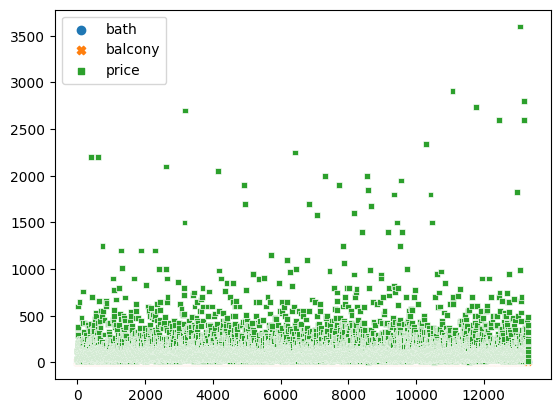

In [ ]:
sns.scatterplot(df)

In [ ]:
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

In [ ]:
value_count(df)


Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
--------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
-----------------------------

<Axes: >

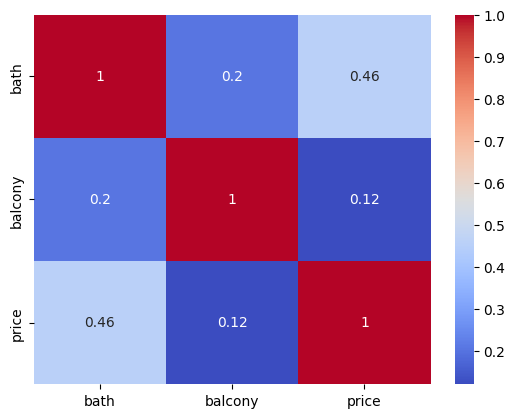

In [ ]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)

In [ ]:
df.isnull().sum() # find the homuch missing data available


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.isnull().mean()*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<Axes: >

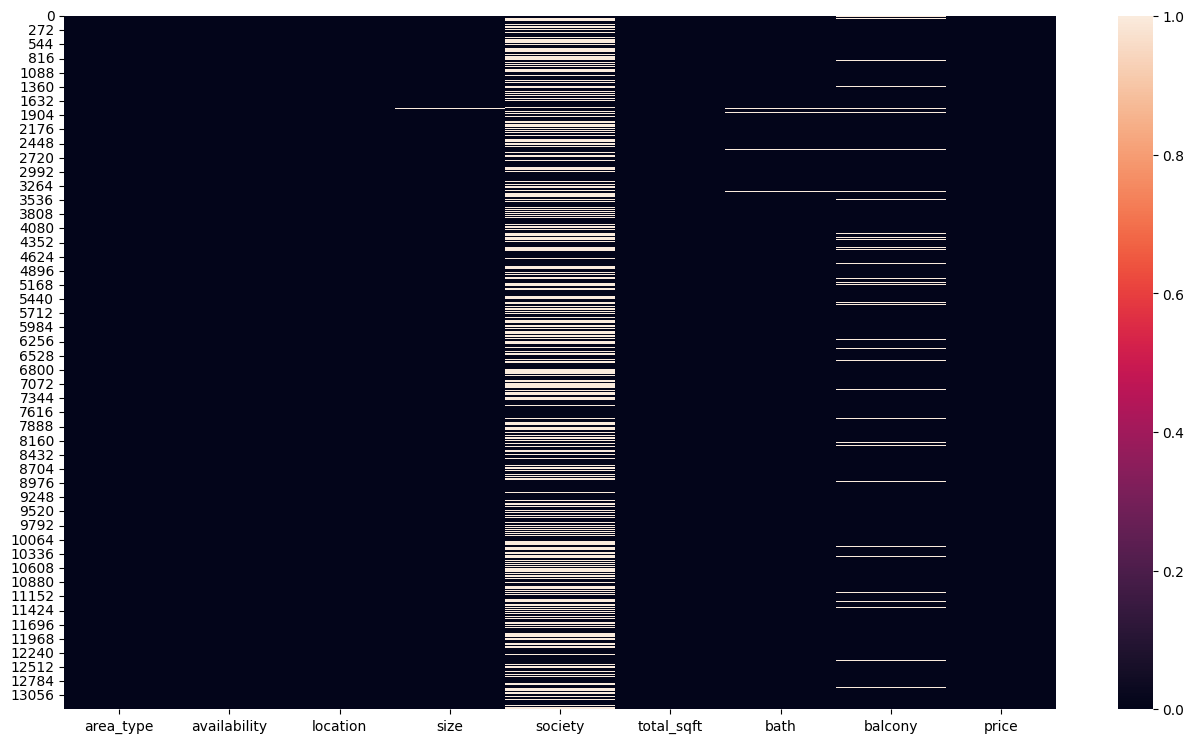

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [ ]:
df2 = df.drop('society', axis='columns')
df2.shape


(13320, 8)

In [ ]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [ ]:
df3 = df2.dropna()
df3.shape

(13246, 8)

In [ ]:
df3.isnull().sum()

df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
df3['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225                  48


In [ ]:
total_sqft_int = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(float(str_val)) # if '123.4' like this value in str then conver in float
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[-1]))/2) # '123 - 534' this str value split and take mean
    except:
      total_sqft_int.append(np.nan)

In [ ]:
df4 = df3.reset_index(drop=True)

In [ ]:
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [ ]:
df5.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0
13245,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0


In [ ]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [ ]:
df6 = df5.dropna()
df6.shape

(13200, 9)

In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [ ]:
df6['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [ ]:
size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)



In [ ]:
df6 = df6.reset_index(drop=True)
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape


(13200, 10)

In [ ]:
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


In [ ]:
import scipy.stats as stats

In [ ]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(16, 4))
  plt.subplot(1, 3, 1)
  sns.distplot(df[variable], bins=30)
  plt.title('Histogram')
  plt.subplot(1, 3, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.ylabel('Variable quantiles')
  plt.subplot(1, 3, 3)
  sns.boxplot(y=df[variable])
  plt.title('Boxplot')
  plt.show()

******* bath *******


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


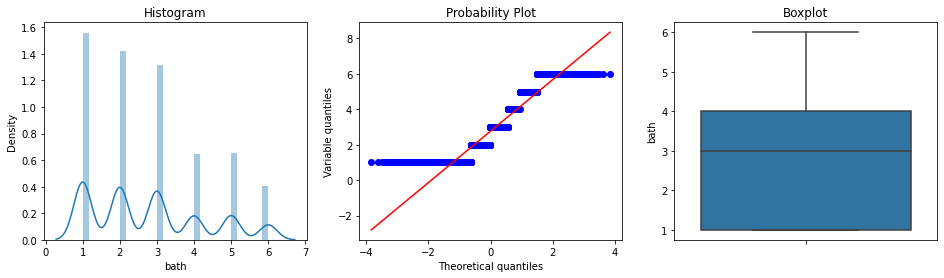

******* balcony *******


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


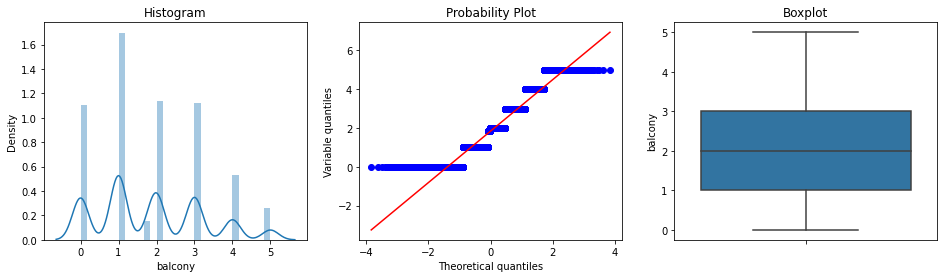

******* total_sqft_int *******


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


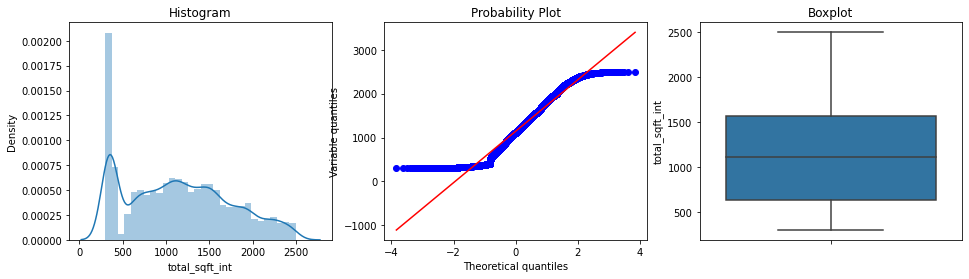

******* bhk *******


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


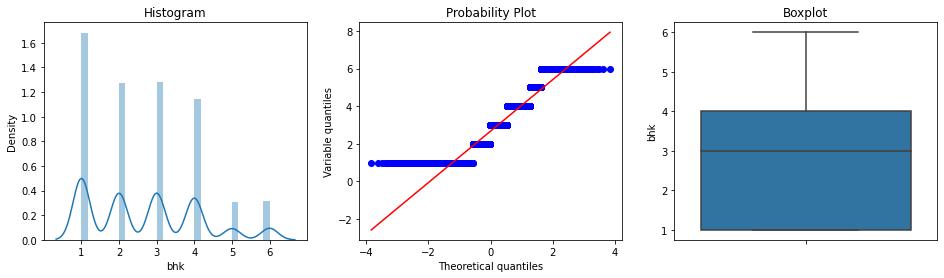

******* price *******


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


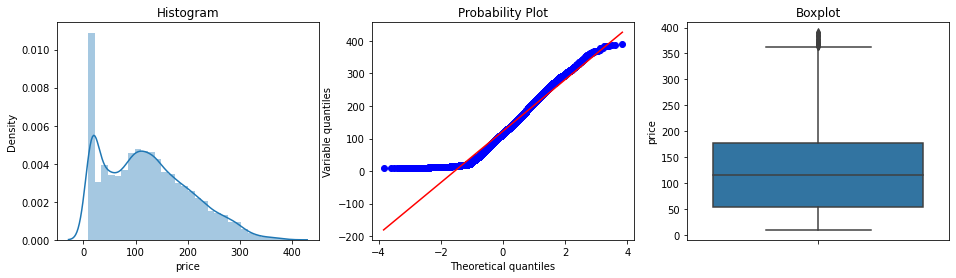

In [ ]:
num_var = ["bath","balcony","total_sqft_int","bhk","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df7, var)


In [ ]:
df7[df7['total_sqft_int']/df7['bhk'] < 350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
3,Super built-up Area,Ready To Move,100 Feet Road-Koramangala,4 BHK,1375,4.0,2.0,119.57000,1375.0,4
24,Super built-up Area,Not ready To Move,Aavalahalli,4 BHK,1383,3.0,3.0,257.11353,1383.0,4
45,Super built-up Area,Not ready To Move,Achit Nagar,4 BHK,1230,4.0,2.0,180.93300,1230.0,4
48,Plot Area,Ready To Move,Achit Nagar,1 RK,314,1.0,1.0,11.02140,314.0,1
55,Super built-up Area,Ready To Move,ACL Layout,1 RK,331,1.0,0.0,15.58679,331.0,1


In [ ]:
df8 = df7[~(df7['total_sqft_int']/df7['bhk'] < 350)]
df8.shape

(8839, 10)

In [ ]:
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']
df8.head()

<ipython-input-37-102ebd353940>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Built-up Area,Ready To Move,100 Feet Road-Koramangala,1 BHK,937,2.0,0.0,82.98072,937.0,1,8856.0
1,Built-up Area,Ready To Move,100 Feet Road-Koramangala,2 BHK,1018,2.0,1.0,90.15408,1018.0,2,8856.0
2,Super built-up Area,Ready To Move,100 Feet Road-Koramangala,3 BHK,1276,2.0,1.0,110.96096,1276.0,3,8696.0
4,Plot Area,Ready To Move,100 Feet Road-Koramangala,2 Bedroom,1143,3.0,3.0,90.54846,1143.0,2,7922.0
5,Plot Area,Ready To Move,100 Feet Road-Koramangala,4 Bedroom,1920,6.0,3.0,152.10240,1920.0,4,7922.0


In [ ]:
df8.price_per_sqft.describe()

count     8839.000000
mean     10625.159973
std       4273.650890
min       3000.000000
25%       7117.500000
50%      10346.000000
75%      13730.000000
max      19994.000000
Name: price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

In [ ]:
df9 = remove_pps_outliers(df8)
df9.shape

(5143, 11)

In [ ]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

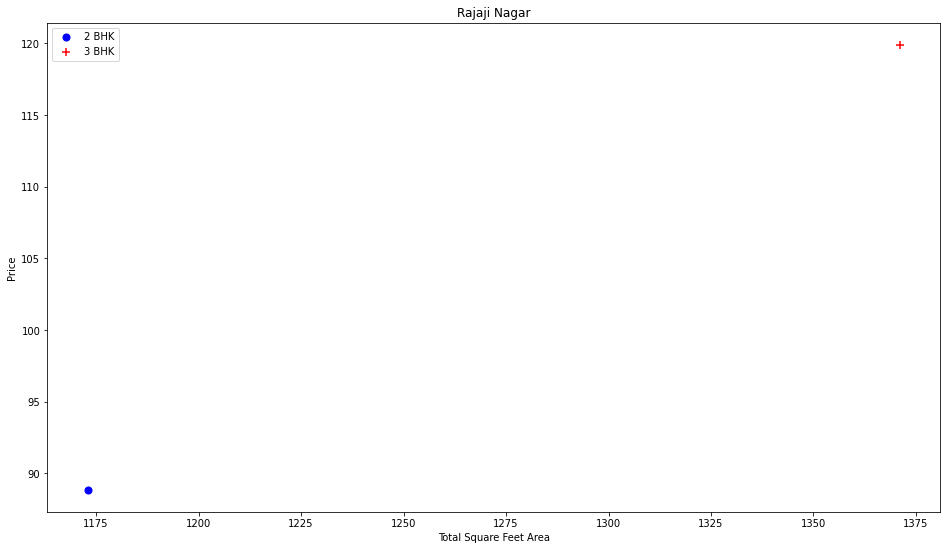

In [ ]:
plot_scatter_chart(df9, "Rajaji Nagar")

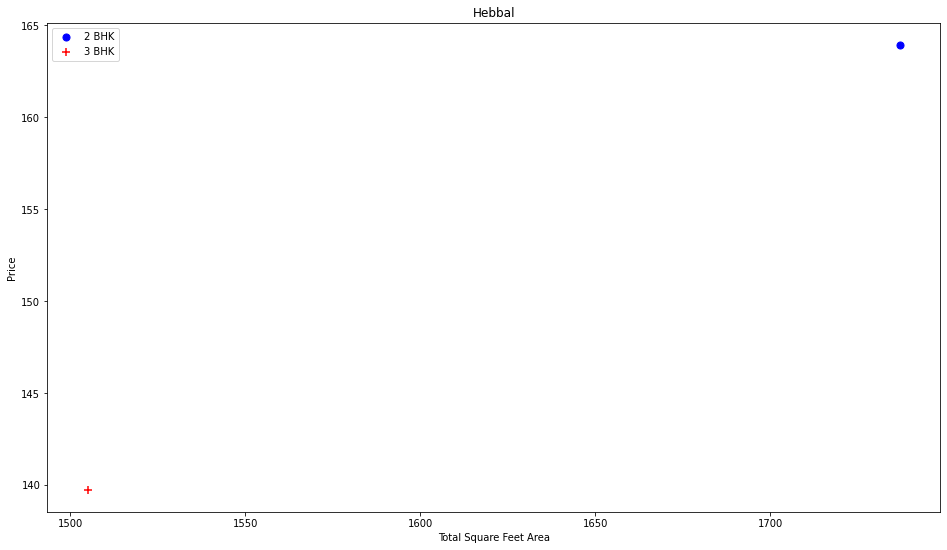

In [ ]:
plot_scatter_chart(df9, "Hebbal")

In [ ]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')


In [ ]:
df10 = remove_bhk_outliers(df9)
df10.shape

(5143, 11)

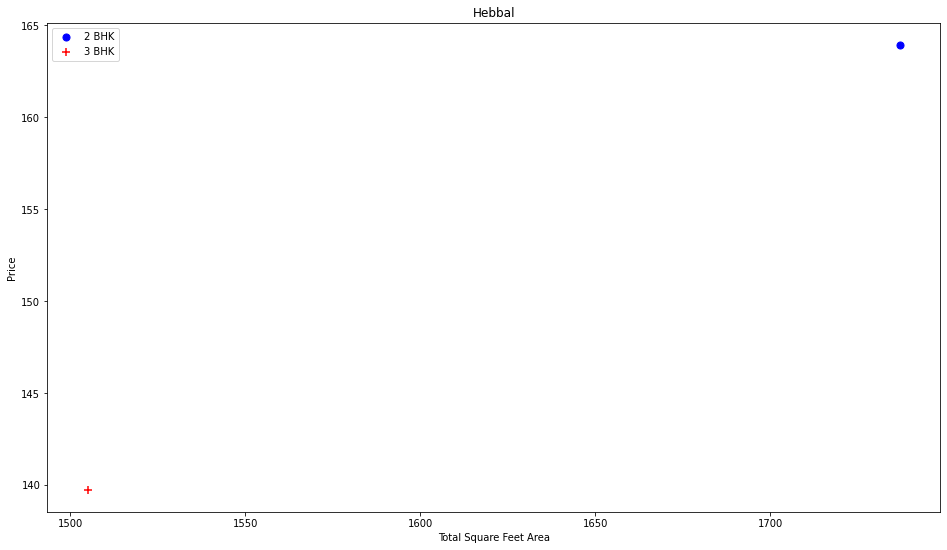

In [ ]:
plot_scatter_chart(df10, "Hebbal")

In [ ]:
df10.bath.unique()



array([2., 3., 6., 5., 4., 1.])

In [ ]:
df10[df10.bath > df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
2314,Plot Area,Ready To Move,KHB Colony-Basaweshwara Nagar,1 RK,387,4.0,1.000000,27.59697,387.0,1,7131.0
2491,Super built-up Area,Ready To Move,Kariyana Palya,1 BHK,367,4.0,3.000000,25.27529,367.0,1,6887.0
2700,Plot Area,Ready To Move,Koramangala 1st Block,1 BHK,382,4.0,2.000000,40.58750,382.0,1,10625.0
2826,Built-up Area,Ready To Move,Kurudusonnenahalli,1 RK,360,4.0,2.000000,46.58040,360.0,1,12939.0
2899,Built-up Area,Not Ready To Move,Langford Gardens,1 BHK,388,4.0,1.000000,31.70736,388.0,1,8172.0
2966,Super built-up Area,Not Ready To Move,Madavara,1 BHK,355,4.0,0.000000,43.98095,355.0,1,12389.0
3175,Super built-up Area,Not Ready To Move,Medaralli,1 BHK,354,4.0,0.000000,29.36430,354.0,1,8295.0
3192,Plot Area,Not Ready To Move,Meenakunte,1 RK,390,4.0,3.000000,31.64460,390.0,1,8114.0
3215,Plot Area,Ready To Move,Minhaj Nagar,1 RK,381,4.0,3.000000,44.15028,381.0,1,11588.0
3424,Super built-up Area,Ready To Move,Nallurhalli,1 BHK,356,4.0,2.000000,29.07808,356.0,1,8168.0


In [ ]:
df11 = df10[df10.bath < df10.bhk+2]
df11.shape


(4917, 11)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

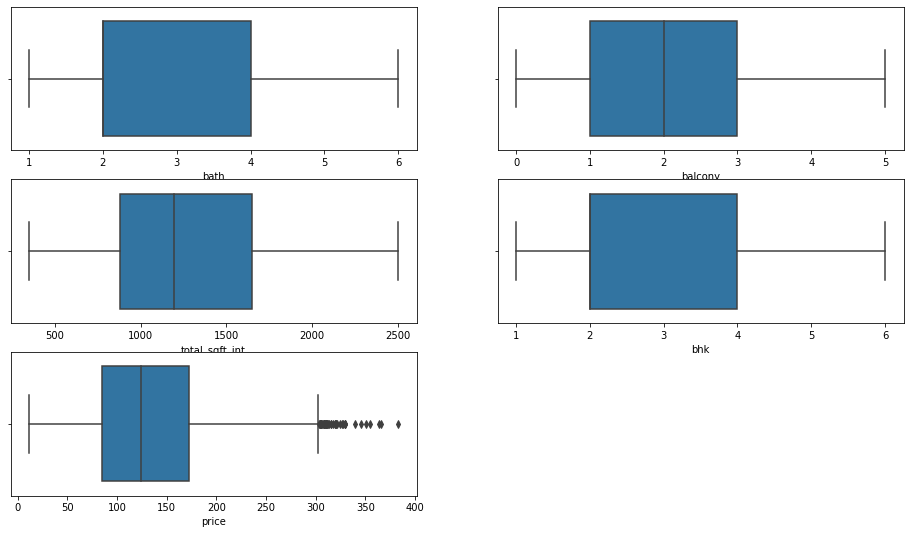

In [ ]:
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
  plt.subplot(3,2,i+1)
  sns.boxplot(df11[var])

In [ ]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Built-up Area,Ready To Move,100 Feet Road-Koramangala,1 BHK,937,2.0,0.0,82.98072,937.0,1,8856.0
1,Built-up Area,Ready To Move,100 Feet Road-Koramangala,2 BHK,1018,2.0,1.0,90.15408,1018.0,2,8856.0
2,Super built-up Area,Ready To Move,100 Feet Road-Koramangala,3 BHK,1276,2.0,1.0,110.96096,1276.0,3,8696.0
3,Plot Area,Ready To Move,100 Feet Road-Koramangala,2 Bedroom,1143,3.0,3.0,90.54846,1143.0,2,7922.0
5,Built-up Area,Not ready To Move,A Dasarahalli,1 BHK,972,2.0,0.0,112.22712,972.0,1,11546.0


In [ ]:
df12 = df11.drop(['area_type', 'availability',"location","size","total_sqft"], axis =1)
df12.head()


,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,2.0,0.0,82.98072,937.0,1,8856.0
1,2.0,1.0,90.15408,1018.0,2,8856.0
2,2.0,1.0,110.96096,1276.0,3,8696.0
3,3.0,3.0,90.54846,1143.0,2,7922.0
5,2.0,0.0,112.22712,972.0,1,11546.0


In [ ]:
df12.to_csv("clean_data.csv", index=False)

In [ ]:
df13 = df11.drop(["size","total_sqft"], axis =1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Built-up Area,Ready To Move,100 Feet Road-Koramangala,2.0,0.0,82.98072,937.0,1,8856.0
1,Built-up Area,Ready To Move,100 Feet Road-Koramangala,2.0,1.0,90.15408,1018.0,2,8856.0
2,Super built-up Area,Ready To Move,100 Feet Road-Koramangala,2.0,1.0,110.96096,1276.0,3,8696.0
3,Plot Area,Ready To Move,100 Feet Road-Koramangala,3.0,3.0,90.54846,1143.0,2,7922.0
5,Built-up Area,Not ready To Move,A Dasarahalli,2.0,0.0,112.22712,972.0,1,11546.0


In [ ]:
df14 = pd.get_dummies(df13, drop_first=True, columns=['area_type','availability','location'])
df14.shape

(4917, 1500)

In [ ]:
df14.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Plot Area,area_type_Super built-up Area,availability_Not ready To Move,availability_Ready To Move,location_A Dasarahalli,location_A Narayanapura,location_ACL Layout,location_AECS Layout,location_AECS Layout – A Block,location_AECS Layout – B Block,location_AECS Layout – C Block,location_AGS Layout,location_AMCO Colony,location_AMS Layout,location_Aavalahalli,location_Abbaiah Reddy Layout,location_Abbigere,location_Achit Nagar,location_Adakamaranahalli,location_Adarsh Nagar-Nelamangala,location_Adde Vishwanathapura,location_Addiganahalli,location_Adityanagar-Vidyaranyapura,location_Adugodi,location_Aduru-Aavalahalli,location_Aduru-Anekal,location_Aga Abbas Ali Road,location_Agara-HSR Layout,location_Agrahara Badavane,location_Agrahara-Yelahanka,location_Agram-Domlur,location_Ajjagondahalli,location_Akkipete,location_Akshaya Nagar-Ramamurthy Nagar,location_Akshayanagar,location_Alfa Gardens,location_Allalasandra,location_Alur,location_Amaravathi Layout-Peenya,location_Amarjyothi Layout-Domlur,location_Amarjyothi Layout-RMV Layout,location_Ambalipura Sarjapur Road,location_Ambedkar Layout,location_Ambedkar Veedhi,location_Amrita Nagar,location_Amrutahalli-Byatarayanapura,location_Amruthnagar,location_Anagalapura,location_Anand Nagar,location_Anandapura,location_Anantapuram,location_Ananth Nagar Phase 1,location_Ananth Nagar Phase 2,location_Anchepalya,location_Andrahalli,location_Andrahalli Main Road,location_Anekal,location_Anekal Thally Road,location_Anekal – Hosur Road,location_Anepalya,location_Anjana Nagar,location_Anjanapura,location_Anjanapura 11th Block,location_Anjanapura 2nd block,location_Anjanapura 7th Block,location_Anjanapura Township,location_Annaiah Reddy Layout-JP Nagar,location_Annapurneshwari Nagar,location_Annapurneswari Layout,location_Annasandrapalya Extension,location_Anugraha Layout,location_Arabic College,location_Arasanahalli,location_Arasanakunte,location_Arehalli,location_Arekere,location_Arkavathy Layout,location_Armane Nagar,location_Ashirvad Colony,location_Ashok Nagar,location_Ashraya Layout,location_Ashta Laxmi Layout,location_Ashwath Nagar,location_Ashwini Layout,location_Atmananda Colony,location_Attibele,location_Attibele Industrial Area,location_Attibele – Anekal Road,location_Attiguppe,location_Attukal Layout,location_Attur Layout,location_Austin Town,location_Avalahalli-Huskuru,location_Avenue Road,location_Averahalli,location_Ayappa Garden-Adugodi,location_Ayyappa Nagar,location_Azad Nagar,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BDA Layout-BTM,location_BDA Layout-HSR,location_BEL Layout,location_BEL Layout 1st Block,location_BEL Layout 2nd Block,location_BEML Layout,location_BEML Layout Raja Rajeshwari Nagar,location_BK Nagar,location_BP Wadia Road,location_BTM Layout,location_BTM Layout 1st Stage,location_BTM Layout 2nd Stage,location_BTS Layout,location_Babusa Palya,location_Bachappa Layout,location_Badamanavarathekaval,location_Bagalakunte,location_Bagalur Main Road,location_Bagalur Road,location_Bagalur Sarjapur Road,location_Bagaluru,location_Bagegowda Layout,location_Bagepalli,location_Bahubali Nagar,location_Baiyappanahalli-Kithiganur,location_Baiyyappanahalli,location_Balagaranahalli,location_Balagere,location_Balaji Layout-Kaggadasapura,location_Balaji Layout-Kanakapura Road,location_Balaji Nagar-BTM Layout,location_Balepete,location_Ballur,location_Bammanahalli-Devanahalli,location_Banashankari,location_Banashankari 1st Stage,location_Banashankari 2nd Stage,location_Banashankari 3rd Stage,location_Banashankari 4th Stage,location_Banashankari 5th Stage,location_Banashankari 6th Stage,location_Banaswadi,location_Bandappa Garden,location_Bandapura,location_Bande Bommasandra,location_Bande Kodigehalli,location_Bande Nalla Sandra,location_Bandepalya,location_Bangalore- Hyderabad Highway Road,location_Banjara Layout,location_Bank Avenue Colony,location_Bannerghatta,location_Bannerghatta Jig

In [ ]:
df14.to_csv('oh_encoded_data.csv', index=False)

In [ ]:
df13['area_type'].value_counts()

Built-up  Area          1966
Plot  Area              1773
Super built-up  Area    1178
Name: area_type, dtype: int64

In [ ]:
df15 = df13.copy()

In [ ]:
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df15["area_type"+cat_var] = np.where(df15['area_type']==cat_var, 1,0)
df15.shape

(4917, 12)

In [ ]:
df15.head(2)

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Built-up Area,Ready To Move,100 Feet Road-Koramangala,2.0,0.0,82.98072,937.0,1,8856.0,0,1,0
1,Built-up Area,Ready To Move,100 Feet Road-Koramangala,2.0,1.0,90.15408,1018.0,2,8856.0,0,1,0


In [ ]:
df15["availability"].value_counts()

Ready To Move        2521
Not ready To Move    2382
Not Ready To Move      14
Name: availability, dtype: int64

In [ ]:
df15["availability_Ready To Move"] = np.where(df15["availability"]=="Ready To Move",1,0)
df15.shape

(4917, 13)

In [ ]:
df15.tail()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
5138,Plot Area,Ready To Move,kaikondrahalli,1.0,1.0,16.35030,370.0,1,4419.0,0,0,1,1
5139,Super built-up Area,Ready To Move,kaikondrahalli,2.0,2.0,29.68140,370.0,1,8022.0,1,0,0,1
5140,Super built-up Area,Ready To Move,lal bagh,3.0,2.0,89.36653,1051.0,3,8503.0,1,0,0,1
5141,Plot Area,Ready To Move,lal bagh,2.0,2.0,156.01554,1797.0,2,8682.0,0,0,1,1
5142,Plot Area,Ready To Move,lal bagh,5.0,4.0,213.57720,2460.0,5,8682.0,0,0,1,1


In [ ]:
location_value_count = df15['location'].value_counts()
location_value_count

Uttarahalli                               10
Chunchgatta                                8
Banashankari                               8
Venkatadri Layout                          7
St Thomas Town                             6
Bapagrama                                  6
Kanakapura Road                            6
Ganigarapalya                              6
Gauribidanur                               6
Somashetti Halli                           6
Soundarya Layout                           6
Jaylakshmi Puram                           6
Sri Ram Puram                              6
Gruha Lakshmi Layout                       6
GKW Layout                                 6
Averahalli                                 6
Jangamakote                                6
Sulthangunta                               6
Jakkur                                     6
Arkavathy Layout                           6
Thalaghattapura                            6
Tharahunise                                6
JC Nagar  

In [ ]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index([], dtype='object')

In [ ]:
df16 = df15.copy()
for cat_var in location_gert_20:
  df16['location_'+cat_var]=np.where(df16['location']==cat_var, 1,0)
df16.shape


(4917, 13)

In [ ]:
df16.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
0,Built-up Area,Ready To Move,100 Feet Road-Koramangala,2.0,0.0,82.98072,937.0,1,8856.0,0,1,0,1
1,Built-up Area,Ready To Move,100 Feet Road-Koramangala,2.0,1.0,90.15408,1018.0,2,8856.0,0,1,0,1
2,Super built-up Area,Ready To Move,100 Feet Road-Koramangala,2.0,1.0,110.96096,1276.0,3,8696.0,1,0,0,1
3,Plot Area,Ready To Move,100 Feet Road-Koramangala,3.0,3.0,90.54846,1143.0,2,7922.0,0,0,1,1
5,Built-up Area,Not ready To Move,A Dasarahalli,2.0,0.0,112.22712,972.0,1,11546.0,0,1,0,0


In [ ]:
df17 = df16.drop(["area_type","availability",'location'], axis =1)
df17.shape

(4917, 10)

In [ ]:
df17.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
0,2.0,0.0,82.98072,937.0,1,8856.0,0,1,0,1
1,2.0,1.0,90.15408,1018.0,2,8856.0,0,1,0,1
2,2.0,1.0,110.96096,1276.0,3,8696.0,1,0,0,1
3,3.0,3.0,90.54846,1143.0,2,7922.0,0,0,1,1
5,2.0,0.0,112.22712,972.0,1,11546.0,0,1,0,0


In [ ]:
df17.to_csv('ohe_data_reduce_cat_class.csv', index=False)

##**Machine Learning Model Training and Testing & Save**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


In [ ]:
path = open(r"/content/oh_encoded_data.csv") # oh_encoded_data.csv from drive


In [ ]:
df = pd.read_csv(path)
df.shape


(4917, 1500)

In [ ]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_type_Plot Area,area_type_Super built-up Area,availability_Not ready To Move,availability_Ready To Move,location_A Dasarahalli,location_A Narayanapura,location_ACL Layout,location_AECS Layout,location_AECS Layout – A Block,location_AECS Layout – B Block,location_AECS Layout – C Block,location_AGS Layout,location_AMCO Colony,location_AMS Layout,location_Aavalahalli,location_Abbaiah Reddy Layout,location_Abbigere,location_Achit Nagar,location_Adakamaranahalli,location_Adarsh Nagar-Nelamangala,location_Adde Vishwanathapura,location_Addiganahalli,location_Adityanagar-Vidyaranyapura,location_Adugodi,location_Aduru-Aavalahalli,location_Aduru-Anekal,location_Aga Abbas Ali Road,location_Agara-HSR Layout,location_Agrahara Badavane,location_Agrahara-Yelahanka,location_Agram-Domlur,location_Ajjagondahalli,location_Akkipete,location_Akshaya Nagar-Ramamurthy Nagar,location_Akshayanagar,location_Alfa Gardens,location_Allalasandra,location_Alur,location_Amaravathi Layout-Peenya,location_Amarjyothi Layout-Domlur,location_Amarjyothi Layout-RMV Layout,location_Ambalipura Sarjapur Road,location_Ambedkar Layout,location_Ambedkar Veedhi,location_Amrita Nagar,location_Amrutahalli-Byatarayanapura,location_Amruthnagar,location_Anagalapura,location_Anand Nagar,location_Anandapura,location_Anantapuram,location_Ananth Nagar Phase 1,location_Ananth Nagar Phase 2,location_Anchepalya,location_Andrahalli,location_Andrahalli Main Road,location_Anekal,location_Anekal Thally Road,location_Anekal – Hosur Road,location_Anepalya,location_Anjana Nagar,location_Anjanapura,location_Anjanapura 11th Block,location_Anjanapura 2nd block,location_Anjanapura 7th Block,location_Anjanapura Township,location_Annaiah Reddy Layout-JP Nagar,location_Annapurneshwari Nagar,location_Annapurneswari Layout,location_Annasandrapalya Extension,location_Anugraha Layout,location_Arabic College,location_Arasanahalli,location_Arasanakunte,location_Arehalli,location_Arekere,location_Arkavathy Layout,location_Armane Nagar,location_Ashirvad Colony,location_Ashok Nagar,location_Ashraya Layout,location_Ashta Laxmi Layout,location_Ashwath Nagar,location_Ashwini Layout,location_Atmananda Colony,location_Attibele,location_Attibele Industrial Area,location_Attibele – Anekal Road,location_Attiguppe,location_Attukal Layout,location_Attur Layout,location_Austin Town,location_Avalahalli-Huskuru,location_Avenue Road,location_Averahalli,location_Ayappa Garden-Adugodi,location_Ayyappa Nagar,location_Azad Nagar,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BDA Layout-BTM,location_BDA Layout-HSR,location_BEL Layout,location_BEL Layout 1st Block,location_BEL Layout 2nd Block,location_BEML Layout,location_BEML Layout Raja Rajeshwari Nagar,location_BK Nagar,location_BP Wadia Road,location_BTM Layout,location_BTM Layout 1st Stage,location_BTM Layout 2nd Stage,location_BTS Layout,location_Babusa Palya,location_Bachappa Layout,location_Badamanavarathekaval,location_Bagalakunte,location_Bagalur Main Road,location_Bagalur Road,location_Bagalur Sarjapur Road,location_Bagaluru,location_Bagegowda Layout,location_Bagepalli,location_Bahubali Nagar,location_Baiyappanahalli-Kithiganur,location_Baiyyappanahalli,location_Balagaranahalli,location_Balagere,location_Balaji Layout-Kaggadasapura,location_Balaji Layout-Kanakapura Road,location_Balaji Nagar-BTM Layout,location_Balepete,location_Ballur,location_Bammanahalli-Devanahalli,location_Banashankari,location_Banashankari 1st Stage,location_Banashankari 2nd Stage,location_Banashankari 3rd Stage,location_Banashankari 4th Stage,location_Banashankari 5th Stage,location_Banashankari 6th Stage,location_Banaswadi,location_Bandappa Garden,location_Bandapura,location_Bande Bommasandra,location_Bande Kodigehalli,location_Bande Nalla Sandra,location_Bandepalya,location_Bangalore- Hyderabad Highway Road,location_Banjara Layout,location_Bank Avenue Colony,location_Bannerghatta,location_Bannerghatta Jig

In [ ]:
df.shape

(4917, 1500)

In [ ]:
X = df.drop("price", axis=1)
y = df['price']
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)


Shape of X =  (4917, 1499)
Shape of y =  (4917,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)


Shape of X_train =  (3933, 1499)
Shape of y_train =  (3933,)
Shape of X_test =  (984, 1499)
Shape of y_test =  (984,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()
def rmse(y_test, y_pred):
  return np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test) # with all num var 0.7842744111909903
lr_rmse = rmse(y_test, lr.predict(X_test))
lr_score, lr_rmse

(-7.173720513289113e+22, 16959968609942.936)

In [ ]:
lr_lasso.fit(X_train, y_train)
lr_lasso_score=lr_lasso.score(X_test, y_test) # with balcony 0.5162364637824872
lr_lasso_rmse = rmse(y_test, lr_lasso.predict(X_test))
lr_lasso_score, lr_lasso_rmse


(0.9391683122150721, 15.617724261954223)

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
svr_score=svr.score(X_test,y_test) # with 0.2630802200711362
svr_rmse = rmse(y_test, svr.predict(X_test))
svr_score, svr_rmse


(0.03271287571645887, 62.27740690739209)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_score=rfr.score(X_test,y_test) # with 0.8863376025408044
rfr_rmse = rmse(y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.9991137446819642, 1.885090674124115)

In [ ]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train,y_train)
xgb_reg_score=xgb_reg.score(X_test,y_test) # with 0.8838865742273464
xgb_reg_rmse = rmse(y_test, xgb_reg.predict(X_test))
xgb_reg_score, xgb_reg_rmse


(0.9974728478549424, 3.1832336149510763)

In [ ]:
print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score, "RMSE":lr_rmse},
              {'Model': 'Lasso','Score':lr_lasso_score, "RMSE":lr_lasso_rmse},
              {'Model': 'Support Vector Machine','Score':svr_score, "RMSE":svr_rmse},
              {'Model': 'Random Forest','Score':rfr_score, "RMSE":rfr_rmse},
              {'Model': 'XGBoost','Score':xgb_reg_score, "RMSE":xgb_reg_rmse}],
             columns=['Model','Score','RMSE']))


                    Model         Score          RMSE
0       Linear Regression -7.173721e+22  1.695997e+13
1                   Lasso  9.391683e-01  1.561772e+01
2  Support Vector Machine  3.271288e-02  6.227741e+01
3           Random Forest  9.991137e-01  1.885091e+00
4                 XGBoost  9.974728e-01  3.183234e+00


In [ ]:
from sklearn.model_selection import KFold,cross_val_score
cvs = cross_val_score(xgb_reg, X_train,y_train, cv = 10)
cvs, cvs.mean() # 0.9845963377450353)



(array([0.9971644 , 0.99721073, 0.99732304, 0.99726808, 0.99742722,
        0.99749831, 0.99736246, 0.9973486 , 0.99715211, 0.99695967]),
 0.9972714619960916)

In [ ]:
cvs_rfr = cross_val_score(rfr, X_train,y_train, cv = 10)
cvs_rfr, cvs_rfr.mean()

(array([0.99906801, 0.99895806, 0.99883862, 0.99910241, 0.99860081,
        0.99937201, 0.99881565, 0.99896658, 0.99849786, 0.99853308]),
 0.9988753087509563)

In [ ]:
from sklearn.model_selection import cross_val_score
cvs_rfr2 = cross_val_score(RandomForestRegressor(), X_train,y_train, cv = 10)
cvs_rfr2, cvs_rfr2.mean() # 0.9652425691235843)

(array([0.99909624, 0.99889281, 0.99880436, 0.99914233, 0.99880254,
        0.99935115, 0.99882709, 0.99903614, 0.99869244, 0.99861226]),
 0.9989257359523955)

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
model = xgb.XGBRegressor()
parameters = {'n_estimators': [50],
              'learning_rate': [0.05],
              'max_depth': [3]}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)
print("Best hyperScore",grid_search.best_score_)




Best hyperparameters:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
Best hyperScore -261.8996036146767


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'learning_rate': [0.1], #so called `eta` value, # [default=0.3] Analogous to learning rate in GBM
              'min_child_weight': [1], #[default=1] Defines the minimum sum of weights of all observations required in a child.
              'max_depth': [4], #[default=6] The maximum depth of a tree,
              'gamma':[0.1], #Gamma specifies the minimum loss reduction required to make a split.
              'subsample': [0.7], #Denotes the fraction of observations to be randomly samples for each tree.
              'colsample_bytree': [1], #Denotes the fraction of columns to be randomly samples for each tree.
              'objective':['reg:linear'], #This defines the loss function to be minimized.

              'n_estimators': [100,300,500]}
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_score_) # 0.9397345161940295
print(xgb_grid.best_params_)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[05:41:24] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
0.9981106965544246
{'colsample_bytree': 1, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 500, 'objective': 'reg:linear', 'subsample': 0.7}


In [ ]:
regr = XGBRegressor(random_state=1).fit(X_train, y_train)
print("Train Accuracy ",regr.score(X_train,y_train)*100)
print("Test Accuracy ",regr.score(X_test, y_test)*100)

Train Accuracy  99.92019413123242
Test Accuracy  99.74728478549424


In [ ]:
cvs = cross_val_score(regr, X_train,y_train, cv = 2)
cvs, cvs.mean()

(array([0.99631606, 0.99622764]), 0.9962718491851426)

In [ ]:
np.sqrt(mean_squared_error(y_test,regr.predict(X_test)))

3.1832336149510763

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)
print("Train Accuracy ",regr.score(X_train,y_train)*100)
print("Test Accuracy ",regr.score(X_test, y_test)*100)

Train Accuracy  99.88515569194047
Test Accuracy  90.163050944496


##**Test Model**

In [ ]:
list(X.columns)

['bath',
 'balcony',
 'total_sqft_int',
 'bhk',
 'price_per_sqft',
 'area_type_Plot  Area',
 'area_type_Super built-up  Area',
 'availability_Not ready To Move',
 'availability_Ready To Move',
 'location_A Dasarahalli',
 'location_A Narayanapura',
 'location_ACL Layout',
 'location_AECS Layout',
 'location_AECS Layout – A Block',
 'location_AECS Layout – B Block',
 'location_AECS Layout – C Block',
 'location_AGS Layout',
 'location_AMCO Colony',
 'location_AMS Layout',
 'location_Aavalahalli',
 'location_Abbaiah Reddy Layout',
 'location_Abbigere',
 'location_Achit Nagar',
 'location_Adakamaranahalli',
 'location_Adarsh Nagar-Nelamangala',
 'location_Adde Vishwanathapura',
 'location_Addiganahalli',
 'location_Adityanagar-Vidyaranyapura',
 'location_Adugodi',
 'location_Aduru-Aavalahalli',
 'location_Aduru-Anekal',
 'location_Aga Abbas Ali Road',
 'location_Agara-HSR Layout',
 'location_Agrahara Badavane',
 'location_Agrahara-Yelahanka',
 'location_Agram-Domlur',
 'location_Ajjagondah

In [ ]:
def predict_house_price(model,bath,balcony,total_sqft_int,bhk,price_per_sqft,area_type,availability,location):

  x =np.zeros(len(X.columns)) # create zero numpy array, len = 107 as input value for model
  x[0]=bath
  x[1]=balcony
  x[2]=total_sqft_int
  x[3]=bhk
  x[4]=price_per_sqft
  if "availability"=="Ready To Move":
    x[8]=1

  if 'area_type'+area_type in X.columns:
    area_type_index = np.where(X.columns=="area_type"+area_type)[0][0]
    x[area_type_index] =1

    #print(area_type_index)

  if 'location_'+location in X.columns:
    loc_index = np.where(X.columns=="location_"+location)[0][0]
    x[loc_index] =1

    #print(loc_index)
  x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array
  #print(x)

  return model.predict([x])[0] # return the predicted value by train XGBoost model



In [ ]:
predict_house_price(model=xgb_tune, bath=3,balcony=2,total_sqft_int=1672,bhk=3,price_per_sqft=8971.291866,area_type="Plot  Area",availability="Ready To Move",location="Devarabeesana Halli")

##test sample
#area_type  availability    location    bath    balcony price   total_sqft_int  bhk price_per_sqft
#2  Super built-up Area Ready To Move   Devarabeesana Halli 3.0 2.0 150.0   1750.0  3   8571.428571

predict_house_price(model=xgb_tune, bath=3,balcony=2,total_sqft_int=1750,bhk=3,price_per_sqft=8571.428571,area_type="Super built-up",availability="Ready To Move",location="Nagarabhavi")


148.40038

In [ ]:
predict_house_price(model=xgb_tune,bath=3,balcony=3,total_sqft_int=1750,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")


144.22195

In [ ]:
predict_house_price(model=xgb_tune,bath=1,balcony=1,total_sqft_int=1500,bhk=3,price_per_sqft=6514.285714,area_type="Built-up Area",availability="Ready To Move",location="Nagarabhavi")


97.68342

##**## Save Model & load model**

In [ ]:
import joblib
# save model
joblib.dump(xgb_tune, 'bangalore_house_price_prediction_model.pkl')
joblib.dump(rfr, 'bangalore_house_price_prediction_rfr_model.pkl')


['bangalore_house_price_prediction_rfr_model.pkl']

In [ ]:
bangalore_house_price_prediction_model = joblib.load("bangalore_house_price_prediction_model.pkl")


In [ ]:
predict_house_price(bangalore_house_price_prediction_model,bath=3,balcony=3,total_sqft_int=150,bhk=3,price_per_sqft=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")
